# Titanic survived Project
### Project Description
The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. 
Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

#### Dataset Link-
https://github.com/dsrscientist/dataset1/blob/master/titanic_train.csv


In [1]:
# importing required labraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading dataset
df = pd.read_csv("titanic_train.csv")

# our dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Our dataset has 891 rows and 12 columns. Survived column is the target variable and others are features. Survived column contains only two values 0 and 1. 1 means passenger survived and 0 means passenger not survived. Name, Sex, Ticket, Cabin and Embarked are categorical columns and PassengerId, Survived, Pclass, Age, SibSp, Parch and Fare are numerical columns.

About columns:-

PassengerId -  passengerId                                                                                    
Survived    -  passenger survived or not                                                                                   
Pclass      -   passenger class. It contains three classes 1st,2nd and 3rd                                                   
Name        -  name of the passenger                                                                                             
Sex         -  gender of the passenger (male,female)                                                                            
Age         -  age of the passenger                                                                                             
SibSp       -  siblings / spouses                                                                                             
Parch       -  parents / children                                                                                             
Ticket      -  ticket number                                                                                                     
Fare        -  travelling fare                                                                                                   
Cabin       -  cabin number                                                                                                     
Embarked    -  it contains three values S(Southampton), C(Cherbourg) and Q(Queenstown).

### Exploratory Data Analysis (EDA)

In [3]:
# checkig dimension of the dataset
df.shape
print('Total number of rows-',df.shape[0],'\nTotal number of columns-',df.shape[1])

Total number of rows- 891 
Total number of columns- 12


In [4]:
# checking the types of the columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Dataset contains three types of data int64, float64 and object.

In [5]:
# checking null values
print("Null values in columns -")
print(df.isnull().sum())
print("\nTotal null values in dataset - ",df.isnull().sum().sum())

print('\nNull values percentage')
for i in df.columns:
    if df[i].isnull().any()==True:
        print(i,'-',df[i].isnull().sum()/len(df)*100)

Null values in columns -
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Total null values in dataset -  866

Null values percentage
Age - 19.865319865319865
Cabin - 77.10437710437711
Embarked - 0.22446689113355783


Sincae Cabin column contains 77% null values, I will remove it. Age and Embarked contain 19% and 0.2% null values respectively, we can replace them using mean and mode method.

In [6]:
# checking Age column NaN
df[df['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
# replacing NaN 
df['Age'].replace(np.nan,df['Age'].mean(), inplace=True)
# check null values in column
print(df['Age'].isnull().sum())

0


Null values in Age column have replaced.

In [8]:
# checking Embarked column NaN
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [9]:
# replacing NaN 
df['Embarked'].replace(np.nan,df['Embarked'].mode()[0], inplace=True)
# check null values in column
print(df['Embarked'].isnull().sum())

0


Null values in Embarked column have replaced

In [10]:
# removing cabin column
df.drop(columns='Cabin', inplace=True)

In [11]:
# now our dataset
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


After removing Cabin column our dataset has 11 columns.

In [12]:
# creating function for checking columns unique values
def value_count(dataframe):
    for i in dataframe.columns:
        print('number of unique value in',i,'column -',df[i].nunique())
        print(dataframe[i].value_counts())
        print('\n')    

In [13]:
value_count(df)

number of unique value in PassengerId column - 891
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64


number of unique value in Survived column - 2
0    549
1    342
Name: Survived, dtype: int64


number of unique value in Pclass column - 3
3    491
1    216
2    184
Name: Pclass, dtype: int64


number of unique value in Name column - 891
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64


number of unique v

In [14]:
# lets check the duplicate rows in dataset
df.duplicated().sum()

0

No duplicate rows present in our dataset.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


here we can see that the dataset has 891 rows/entries and 11 columns. No null values present. Data type of columns are int64, object and float64. 

In [16]:
# dropping irrelevant columns
df1 = df.drop(columns=['PassengerId','Name','Ticket'])
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [17]:
# dividing columns in two parts categorical columns and numeriacl columns.
cat_columns = []
num_columns = []
for i in df1.columns:
    if df1[i].dtypes=="object":
        cat_columns.append(i)
    else:
        num_columns.append(i)
print('categorical columns - ',cat_columns)
print('numerical columns - ',num_columns)

categorical columns -  ['Sex', 'Embarked']
numerical columns -  ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [18]:
# statistical description of numerical data
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data visualization

S    646
C    168
Q     77
Name: Embarked, dtype: int64


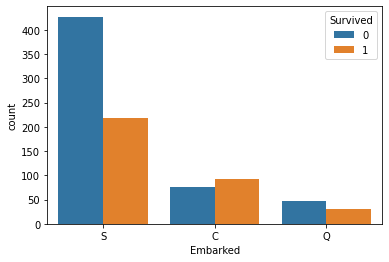

In [19]:
# count plot
print(df['Embarked'].value_counts())
sns.countplot(x='Embarked',hue='Survived',data=df)
plt.show()

3    491
1    216
2    184
Name: Pclass, dtype: int64


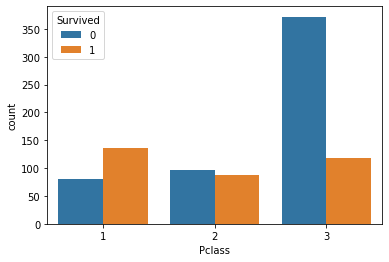

In [20]:
# count plot
print(df['Pclass'].value_counts())
sns.countplot(x='Pclass',hue='Survived',data=df)
plt.show()

male      577
female    314
Name: Sex, dtype: int64


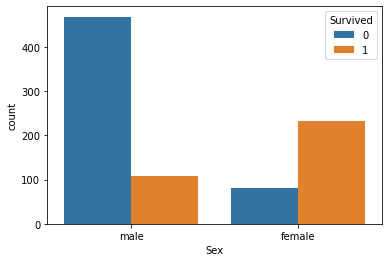

In [21]:
# count plot
print(df['Sex'].value_counts())
sns.countplot(x='Sex',hue='Survived',data=df)
plt.show()

more females survived than males

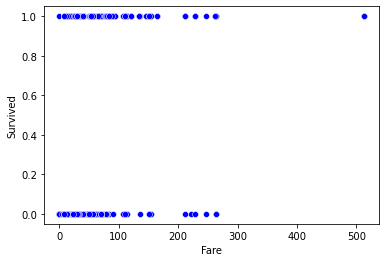

In [22]:
# scatter plot
sns.scatterplot(x='Fare',y='Survived',data=df1, color='blue')
plt.show()

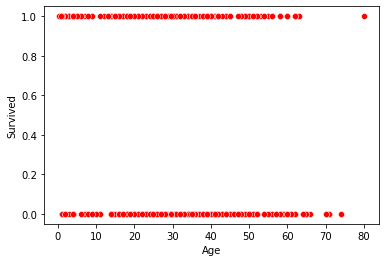

In [23]:
# scatter plot
sns.scatterplot(x='Age',y='Survived',data=df1, color='red')
plt.show()

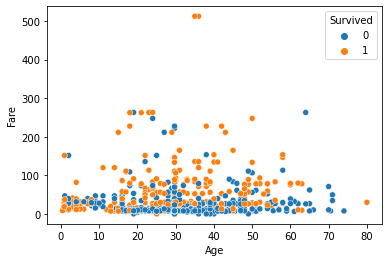

In [24]:
# scatter plot
sns.scatterplot(x='Age',y='Fare',data=df1,hue='Survived')
plt.show()

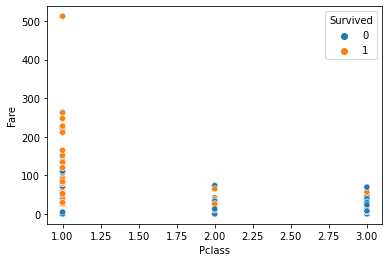

In [25]:
# scatter plot
sns.scatterplot(x='Pclass',y='Fare',data=df1, hue='Survived')
plt.show()

There are more survivors in 1st Pclass than others.

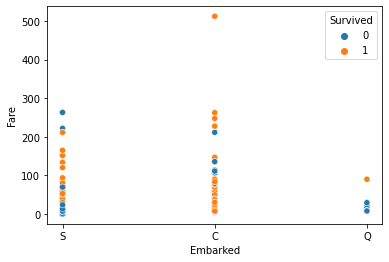

In [26]:
# scatter plot
sns.scatterplot(x='Embarked',y='Fare',data=df1, hue='Survived')
plt.show()

In [27]:
# plot function
def plot(name):
    plt.figure(figsize = (20,16), facecolor = 'white')
    plotnumber = 1

    for i in name:
        if plotnumber <= 20:
            ax = plt.subplot(4 , 3 , plotnumber)
            plot_name(df[i],color='orange')
            plt.xlabel(i, fontsize = 12)
            plotnumber +=1
    plt.show()

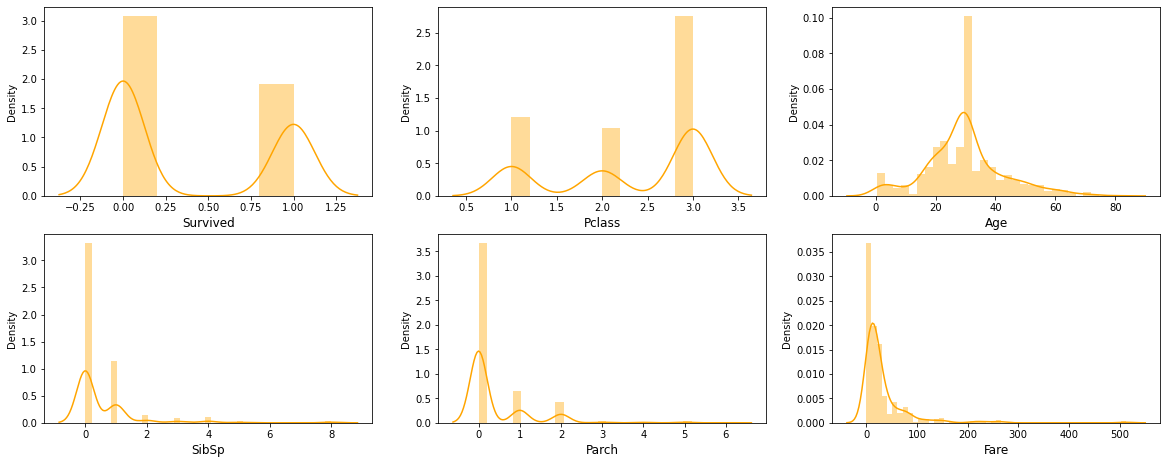

In [28]:
# distribution lpot
plot_name = sns.distplot
plot(num_columns)

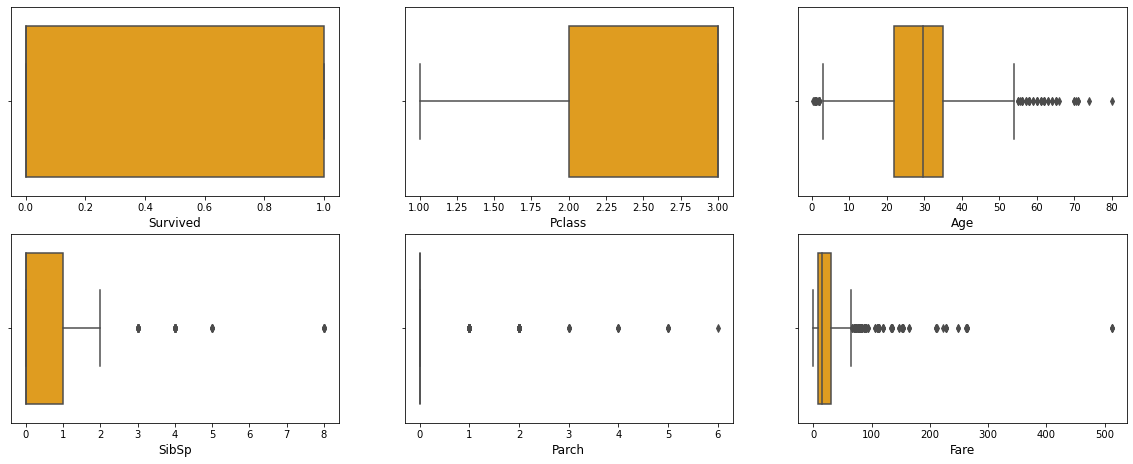

In [29]:
# box plot
plot_name = sns.boxplot
plot(num_columns)

Since columns Survived, Pclass, SibSp and Parch have categorical data no need work on skewness and outliers. I am assuming the fare was fixed. 

In [30]:
# encoding categorical columns
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in cat_columns:
    df1[i] = OE.fit_transform(df1[i].values.reshape(-1,1))
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.000000,1,0,7.2500,2.0
1,1,1,0.0,38.000000,1,0,71.2833,0.0
2,1,3,0.0,26.000000,0,0,7.9250,2.0
3,1,1,0.0,35.000000,1,0,53.1000,2.0
4,0,3,1.0,35.000000,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,1.0,27.000000,0,0,13.0000,2.0
887,1,1,0.0,19.000000,0,0,30.0000,2.0
888,0,3,0.0,29.699118,1,2,23.4500,2.0
889,1,1,1.0,26.000000,0,0,30.0000,0.0


In sex column, 1 = male and 0 = female                                                                                         
In Embarked column, 0 = C, 1 = Q and 2 = S

In [31]:
# checking correlation
df1.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


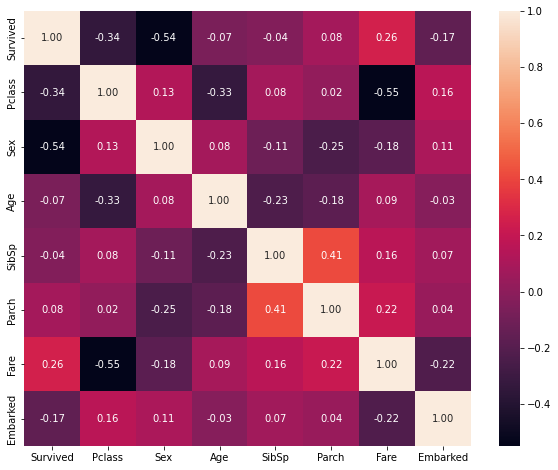

In [32]:
# heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(),annot=True,fmt=".2f")
plt.show()

In [33]:
# separating target variable and features
x = df1.drop(columns = ['Survived'])
y = df1['Survived']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [35]:
x = pd.DataFrame(x_scaler,columns=x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.942303
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.585954
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.585954
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.585954
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.207709,-0.474545,-0.473674,-0.386671,0.585954
887,-1.566107,-1.355574,-0.823344,-0.474545,-0.473674,-0.044381,0.585954
888,0.827377,-1.355574,0.000000,0.432793,2.008933,-0.176263,0.585954
889,-1.566107,0.737695,-0.284663,-0.474545,-0.473674,-0.044381,-1.942303


In [36]:
# checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features']=x.columns
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,vif values
0,Pclass,1.671580
1,Sex,1.108869
2,Age,1.205639
3,SibSp,1.282325
4,Parch,1.322550
5,Fare,1.648696
6,Embarked,1.079324


vif values are less than 5 means variables are not correlated 

In [37]:
# importing required libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,roc_curve,confusion_matrix,auc,roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [38]:
# creating lists of models
LR = LogisticRegression()
RFC = RandomForestClassifier()
ABC = AdaBoostClassifier()
DTC = DecisionTreeClassifier()
GBC = GradientBoostingClassifier()
KNN = KNeighborsClassifier()
ETC = ExtraTreesClassifier()
svc = SVC()

model_list= [LR,RFC,ABC,DTC,GBC,KNN,ETC,svc]

In [39]:
# finding best random state
def model_rs(model):
    max_acc = 0
    max_rs = 0
    for i in range(1,200):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test,y_pred)
        if acc>max_acc:
            max_acc=acc
            max_rs = i
    print('maximum accuracy=',max_acc,'\nbest random state=',max_rs)

In [40]:
# maximum accuracy at random state
model_rs(RFC)

maximum accuracy= 0.8507462686567164 
best random state= 132


In [41]:
# train-test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=132)

In [42]:
# function for model
def model(name):
    name.fit(x_train,y_train)
    y_pred=name.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)
    CM = confusion_matrix(y_test,y_pred)
    CR = classification_report(y_test,y_pred)
    print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)
    
    print('checking Cross validation score:-\n')
    score_cv = cross_val_score(name,x,y)
    cv_mean = score_cv.mean()
    diff = (acc_score - cv_mean)
    print('cross validation scores:-',score_cv,'\ncross validation mean score =',cv_mean,
          '\nDifference between accuracy score and cross validation mean score =',diff)

In [43]:
# all models
for i in model_list:
    print('\n_____________ Using',i,'_____________\n')
    model(i)


_____________ Using LogisticRegression() _____________

Accuracy score = 0.8097014925373134 

confusion matrix:-
 [[141  27]
 [ 24  76]] 

classification report:-
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       168
           1       0.74      0.76      0.75       100

    accuracy                           0.81       268
   macro avg       0.80      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268

checking Cross validation score:-

cross validation scores:- [0.77653631 0.78651685 0.78089888 0.76404494 0.81460674] 
cross validation mean score = 0.7845207457158998 
Difference between accuracy score and cross validation mean score = 0.02518074682141358

_____________ Using RandomForestClassifier() _____________

Accuracy score = 0.8507462686567164 

confusion matrix:-
 [[151  17]
 [ 23  77]] 

classification report:-
               precision    recall  f1-score   support

           0       0.87    

Our best model is ExtraTrees Classifier . It has least difference between accuracy score and cross validation mean score.

#### Hyperparameter tuning

In [44]:
# parameter for extratrees classifier
param = {'n_estimators':[28,62,80],
         'criterion':['gini','entropy','log_loss'],
         'max_depth':[45,89,100],
         'random_state':[79,163,187,193]
        }

GSCV= GridSearchCV(estimator=ETC,param_grid=param,cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [45, 89, 100],
                         'n_estimators': [28, 62, 80],
                         'random_state': [79, 163, 187, 193]})

In [45]:
# finding best parameter value
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 45,
 'n_estimators': 62,
 'random_state': 193}

In [46]:
Model = ExtraTreesClassifier(criterion='entropy',max_depth=45,n_estimators=62,random_state=193)

In [47]:
# final model
Model.fit(x_train,y_train)
y_pred=Model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
CM = confusion_matrix(y_test,y_pred)
CR = classification_report(y_test,y_pred)
print('Accuracy score =',acc_score,'\n\nconfusion matrix:-\n',CM,'\n\nclassification report:-\n',CR)

Accuracy score = 0.8208955223880597 

confusion matrix:-
 [[143  25]
 [ 23  77]] 

classification report:-
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       168
           1       0.75      0.77      0.76       100

    accuracy                           0.82       268
   macro avg       0.81      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [48]:
# ROC curve
fpr,tpr,threshold =roc_curve(y_test,y_pred)
print('Threshold=',threshold,'\nFalse positive rate=',fpr,'\nTrue positive rate=',tpr)

Threshold= [2 1 0] 
False positive rate= [0.         0.14880952 1.        ] 
True positive rate= [0.   0.77 1.  ]


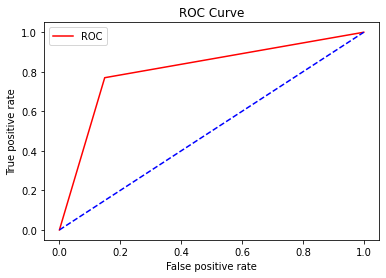

In [49]:
# plotting roc curve
plt.plot(fpr,tpr,color='red', label ='ROC')
plt.plot([0,1],[0,1], color = 'blue',linestyle='--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [50]:
# AUC score
auc_score =roc_auc_score(y_test,y_pred)
print(auc_score)

0.810595238095238


In [51]:
# saving model
import pickle
pickle.dump(Model,open('Titanic_project.pkl','wb'))